ValueError: x and y must have same first dimension, but have shapes (99, 1) and (476, 1)

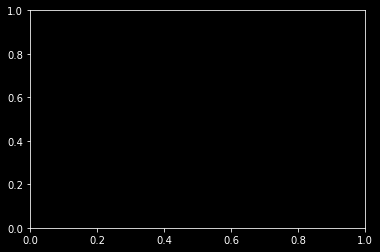

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import pandas as pd

ddql = pd.read_csv("DDQL_5phut.csv").values
dql = pd.read_csv("DQL_5phut.csv").values

totalddql = ddql[:,0].reshape([-1,1])
meanddql = ddql[:,1].reshape([-1,1])

totaldql = dql[0:99,0].reshape([-1,1])
meandql = dql[0:99,1].reshape([-1,1])
x = [i + 1 for i in range(99)]
x = np.array(x).reshape([-1,1])

#print (meanddql) 
plt.plot(x, meanddql)
plt.plot(x, meandql)

plt.show()

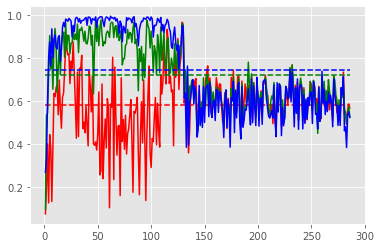

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("DQL_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("DQL_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("DQL_5phut_3.csv").values[:, 1]
data4 = pd.read_csv("DQL_5phut_4.csv").values[:, 1]
data5 = pd.read_csv("DQL_5phut_5.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1, color="red")
plt.plot(number, [np.average(data1)] * data1.shape[0], color="red", linestyle = '--')
plt.plot(number, data2, color="green")
plt.plot(number, [np.average(data2)] * data1.shape[0], color="green", linestyle = '--')
plt.plot(number, data3, color="blue")
plt.plot(number, [np.average(data3)] * data1.shape[0], color="blue", linestyle = '--')
#plt.plot(number, data4)
#plt.plot(number, data5)

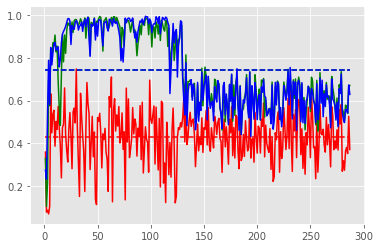

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("DDQL_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("DDQL_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("DDQL_5phut_3.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1, color="red")
plt.plot(number, [np.average(data1)] * data1.shape[0], color="red", linestyle = '--')
plt.plot(number, data2, color="green")
plt.plot(number, [np.average(data2)] * data1.shape[0], color="green", linestyle = '--')
plt.plot(number, data3, color="blue")
plt.plot(number, [np.average(data3)] * data1.shape[0], color="blue", linestyle = '--')


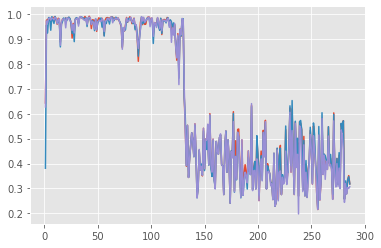

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_1.csv").values[:, 1]
data2 = pd.read_csv("FDQO_5phut_2.csv").values[:, 1]
data3 = pd.read_csv("FDQO_5phut_3.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
plt.plot(number, data2)
plt.plot(number, data3)


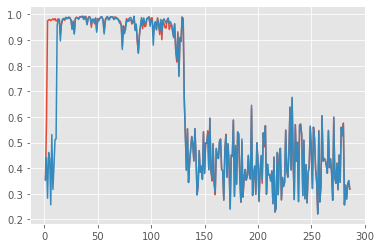

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_6.csv").values[:, 1]
data2 = pd.read_csv("FDQO_5phut_7.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
plt.plot(number, data2)


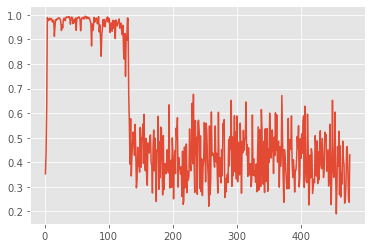

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_8.csv").values[:, 1]
#data2 = pd.read_csv("FDQO_5phut_7.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
#plt.plot(number, data2)


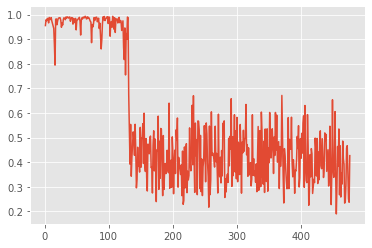

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("FDQO_5phut_9.csv").values[:, 1]
#data2 = pd.read_csv("FDQO_5phut_7.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
#plt.plot(number, data2)

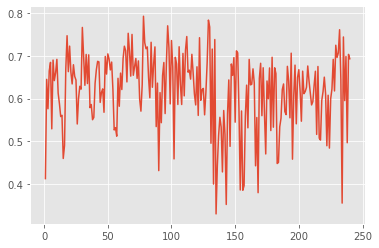

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd

data1 = pd.read_csv("DQL_5phut_6.csv").values[:, 1]
#data2 = pd.read_csv("DDQL_5phut_6.csv").values[:, 1]

number = [i + 1 for i in range(data1.shape[0])]
plt.tight_layout()
plt.plot(number, data1)
#plt.plot(number, data2)

In [1]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

ENV_NAME = 'CartPole-v0'

# Get the environment and extract the number of actions available in the Cartpole problem
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n


model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

policy = EpsGreedyQPolicy()
memory = SequentialMemory(limit=50000, window_length=1)
dqn = DQNAgent(model=model, nb_actions=nb_actions, memory=memory, nb_steps_warmup=10,
target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this slows down training quite a lot. 
dqn.fit(env, nb_steps=50000, visualize=False, verbose=2)
















Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 16)                80        
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 114
Trainable params: 114
Non-trainable params: 0
_________________________________________________________________
None
Training for 50000 steps ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates 

D:\Binh\Anaconda\anaconda3\envs\Billie\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    18/50000: episode: 2, duration: 0.218s, episode steps:   8, steps per second:  37, episode reward:  8.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.732398, mae: 1.014364, mean_q: 1.079608
    28/50000: episode: 3, duration: 0.029s, episode steps:  10, steps per second: 342, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.609807, mae: 0.962077, mean_q: 1.216539
    39/50000: episode: 4, duration: 0.028s, episode steps:  11, steps per second: 391, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.182 [0.000, 1.000],  loss: 0.605938, mae: 0.943851, mean_q: 1.368601
    50/50000: episode: 5, duration: 0.029s, episode steps:  11, steps per second: 383, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.091 [0.000, 1.000],  loss: 0.774733, mae: 0.925541, mean_q: 1.440787
    59/50000: episode: 6, duration: 0.026s, episode steps:   9, step

D:\Binh\Anaconda\anaconda3\envs\Billie\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')
D:\Binh\Anaconda\anaconda3\envs\Billie\lib\site-packages\rl\memory.py:40: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


    96/50000: episode: 10, duration: 0.029s, episode steps:   9, steps per second: 309, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.718787, mae: 0.730600, mean_q: 1.924120
   105/50000: episode: 11, duration: 0.028s, episode steps:   9, steps per second: 320, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.742933, mae: 0.732362, mean_q: 1.963277
   115/50000: episode: 12, duration: 0.029s, episode steps:  10, steps per second: 345, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.669207, mae: 0.659000, mean_q: 2.030084
   125/50000: episode: 13, duration: 0.027s, episode steps:  10, steps per second: 373, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.690908, mae: 0.597414, mean_q: 2.052901
   136/50000: episode: 14, duration: 0.029s, episode steps:  11,

   475/50000: episode: 50, duration: 0.035s, episode steps:  11, steps per second: 312, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.182 [0.000, 1.000],  loss: 0.654483, mae: 1.440207, mean_q: 3.993428
   485/50000: episode: 51, duration: 0.031s, episode steps:  10, steps per second: 328, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.742859, mae: 1.504120, mean_q: 4.019770
   497/50000: episode: 52, duration: 0.032s, episode steps:  12, steps per second: 375, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.083 [0.000, 1.000],  loss: 0.843395, mae: 1.550266, mean_q: 3.998157
   507/50000: episode: 53, duration: 0.028s, episode steps:  10, steps per second: 362, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.000 [0.000, 0.000],  loss: 0.568454, mae: 1.505049, mean_q: 4.004571
   516/50000: episode: 54, duration: 0.024s, episode steps:   9,

   880/50000: episode: 90, duration: 0.032s, episode steps:  12, steps per second: 372, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.250 [0.000, 1.000],  loss: 0.443967, mae: 2.257238, mean_q: 5.368682
   891/50000: episode: 91, duration: 0.029s, episode steps:  11, steps per second: 374, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.091 [0.000, 1.000],  loss: 0.334776, mae: 2.217680, mean_q: 5.470017
   901/50000: episode: 92, duration: 0.028s, episode steps:  10, steps per second: 355, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.100 [0.000, 1.000],  loss: 0.448658, mae: 2.253889, mean_q: 5.493053
   911/50000: episode: 93, duration: 0.028s, episode steps:  10, steps per second: 359, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.200 [0.000, 1.000],  loss: 0.270851, mae: 2.228148, mean_q: 5.691188
   921/50000: episode: 94, duration: 0.027s, episode steps:  10,

  1282/50000: episode: 130, duration: 0.027s, episode steps:   9, steps per second: 329, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.222 [0.000, 1.000],  loss: 0.221936, mae: 2.937874, mean_q: 6.353926
  1292/50000: episode: 131, duration: 0.029s, episode steps:  10, steps per second: 346, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.300 [0.000, 1.000],  loss: 0.184251, mae: 2.897765, mean_q: 6.216651
  1303/50000: episode: 132, duration: 0.029s, episode steps:  11, steps per second: 373, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.273 [0.000, 1.000],  loss: 0.223371, mae: 2.873835, mean_q: 6.057331
  1312/50000: episode: 133, duration: 0.026s, episode steps:   9, steps per second: 349, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.222 [0.000, 1.000],  loss: 0.263788, mae: 2.907677, mean_q: 6.114625
  1327/50000: episode: 134, duration: 0.040s, episode steps:

  1764/50000: episode: 168, duration: 0.026s, episode steps:   9, steps per second: 352, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.749033, mae: 4.149309, mean_q: 7.999706
  1773/50000: episode: 169, duration: 0.025s, episode steps:   9, steps per second: 356, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.668115, mae: 4.186014, mean_q: 8.127429
  1784/50000: episode: 170, duration: 0.029s, episode steps:  11, steps per second: 385, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.909 [0.000, 1.000],  loss: 1.367641, mae: 4.078614, mean_q: 7.806419
  1793/50000: episode: 171, duration: 0.025s, episode steps:   9, steps per second: 367, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 1.000 [1.000, 1.000],  loss: 0.228734, mae: 4.032866, mean_q: 7.864366
  1804/50000: episode: 172, duration: 0.029s, episode steps:

  2155/50000: episode: 205, duration: 0.031s, episode steps:  11, steps per second: 355, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 2.042569, mae: 5.071009, mean_q: 9.204501
  2166/50000: episode: 206, duration: 0.029s, episode steps:  11, steps per second: 375, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 3.071245, mae: 5.019902, mean_q: 9.053159
  2178/50000: episode: 207, duration: 0.032s, episode steps:  12, steps per second: 379, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 2.400677, mae: 5.015092, mean_q: 9.200192
  2187/50000: episode: 208, duration: 0.024s, episode steps:   9, steps per second: 375, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.778 [0.000, 1.000],  loss: 3.275810, mae: 5.190026, mean_q: 9.463395
  2196/50000: episode: 209, duration: 0.024s, episode steps:

  2561/50000: episode: 245, duration: 0.033s, episode steps:  12, steps per second: 369, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.833 [0.000, 1.000],  loss: 1.855829, mae: 5.512248, mean_q: 10.180314
  2571/50000: episode: 246, duration: 0.027s, episode steps:  10, steps per second: 372, episode reward: 10.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.900 [0.000, 1.000],  loss: 2.458170, mae: 5.550392, mean_q: 10.206182
  2580/50000: episode: 247, duration: 0.024s, episode steps:   9, steps per second: 371, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.889 [0.000, 1.000],  loss: 2.283097, mae: 5.517409, mean_q: 10.200862
  2591/50000: episode: 248, duration: 0.031s, episode steps:  11, steps per second: 358, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.818 [0.000, 1.000],  loss: 2.183930, mae: 5.446377, mean_q: 10.135618
  2599/50000: episode: 249, duration: 0.022s, episode st

  2928/50000: episode: 280, duration: 0.038s, episode steps:  12, steps per second: 317, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.750 [0.000, 1.000],  loss: 1.378029, mae: 5.296663, mean_q: 9.962035
  2937/50000: episode: 281, duration: 0.027s, episode steps:   9, steps per second: 336, episode reward:  9.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.778 [0.000, 1.000],  loss: 1.617450, mae: 5.338935, mean_q: 9.967265
  2948/50000: episode: 282, duration: 0.032s, episode steps:  11, steps per second: 346, episode reward: 11.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.727 [0.000, 1.000],  loss: 1.827169, mae: 5.369857, mean_q: 9.919549
  2960/50000: episode: 283, duration: 0.034s, episode steps:  12, steps per second: 349, episode reward: 12.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 1.465389, mae: 5.320828, mean_q: 9.942088
  3017/50000: episode: 284, duration: 0.145s, episode steps:

  5024/50000: episode: 317, duration: 0.078s, episode steps:  26, steps per second: 333, episode reward: 26.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.462 [0.000, 1.000],  loss: 2.606497, mae: 7.957014, mean_q: 15.023714
  5060/50000: episode: 318, duration: 0.107s, episode steps:  36, steps per second: 337, episode reward: 36.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.528 [0.000, 1.000],  loss: 2.625852, mae: 7.807988, mean_q: 14.670078
  5158/50000: episode: 319, duration: 0.285s, episode steps:  98, steps per second: 344, episode reward: 98.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 2.892112, mae: 7.838718, mean_q: 14.714034
  5173/50000: episode: 320, duration: 0.050s, episode steps:  15, steps per second: 298, episode reward: 15.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 2.142642, mae: 7.853645, mean_q: 14.833365
  5245/50000: episode: 321, duration: 0.225s, episode st

  6881/50000: episode: 352, duration: 0.218s, episode steps:  85, steps per second: 390, episode reward: 85.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.482 [0.000, 1.000],  loss: 3.726932, mae: 10.218890, mean_q: 19.440292
  6937/50000: episode: 353, duration: 0.142s, episode steps:  56, steps per second: 396, episode reward: 56.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.518 [0.000, 1.000],  loss: 4.453323, mae: 10.242111, mean_q: 19.373709
  7035/50000: episode: 354, duration: 0.242s, episode steps:  98, steps per second: 404, episode reward: 98.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 3.221934, mae: 10.375713, mean_q: 19.842054
  7089/50000: episode: 355, duration: 0.136s, episode steps:  54, steps per second: 398, episode reward: 54.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.481 [0.000, 1.000],  loss: 3.453356, mae: 10.599626, mean_q: 20.315355
  7167/50000: episode: 356, duration: 0.198s, episod

 10069/50000: episode: 387, duration: 0.260s, episode steps:  90, steps per second: 346, episode reward: 90.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.533 [0.000, 1.000],  loss: 5.632776, mae: 14.154808, mean_q: 27.567152
 10164/50000: episode: 388, duration: 0.241s, episode steps:  95, steps per second: 394, episode reward: 95.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.526 [0.000, 1.000],  loss: 4.379642, mae: 14.450751, mean_q: 28.294737
 10298/50000: episode: 389, duration: 0.344s, episode steps: 134, steps per second: 390, episode reward: 134.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.485 [0.000, 1.000],  loss: 5.723056, mae: 14.578688, mean_q: 28.473661
 10394/50000: episode: 390, duration: 0.241s, episode steps:  96, steps per second: 398, episode reward: 96.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.479 [0.000, 1.000],  loss: 7.474619, mae: 14.718326, mean_q: 28.537468
 10558/50000: episode: 391, duration: 0.393s, episo

 15676/50000: episode: 422, duration: 0.503s, episode steps: 200, steps per second: 398, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 7.795996, mae: 21.887251, mean_q: 43.989639
 15876/50000: episode: 423, duration: 0.516s, episode steps: 200, steps per second: 388, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 10.694450, mae: 22.169188, mean_q: 44.402538
 16048/50000: episode: 424, duration: 0.448s, episode steps: 172, steps per second: 384, episode reward: 172.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.529 [0.000, 1.000],  loss: 8.266264, mae: 22.448078, mean_q: 45.059147
 16248/50000: episode: 425, duration: 0.529s, episode steps: 200, steps per second: 378, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 7.703881, mae: 22.749510, mean_q: 45.817379
 16448/50000: episode: 426, duration: 0.528s, e

 22648/50000: episode: 457, duration: 0.583s, episode steps: 200, steps per second: 343, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.510 [0.000, 1.000],  loss: 15.205091, mae: 30.994095, mean_q: 62.872704
 22848/50000: episode: 458, duration: 0.598s, episode steps: 200, steps per second: 334, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 11.664617, mae: 31.153250, mean_q: 63.514698
 23048/50000: episode: 459, duration: 0.510s, episode steps: 200, steps per second: 392, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 14.294648, mae: 31.559599, mean_q: 64.194901
 23248/50000: episode: 460, duration: 0.608s, episode steps: 200, steps per second: 329, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 16.007259, mae: 31.740269, mean_q: 64.520271
 23448/50000: episode: 461, duration: 0.514s

 29648/50000: episode: 492, duration: 0.523s, episode steps: 200, steps per second: 382, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 13.073660, mae: 37.512936, mean_q: 76.725334
 29848/50000: episode: 493, duration: 0.516s, episode steps: 200, steps per second: 387, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 23.556503, mae: 37.658710, mean_q: 76.605179
 30048/50000: episode: 494, duration: 0.540s, episode steps: 200, steps per second: 370, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.505 [0.000, 1.000],  loss: 19.640417, mae: 37.727993, mean_q: 76.955467
 30248/50000: episode: 495, duration: 0.539s, episode steps: 200, steps per second: 371, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 16.808256, mae: 37.847885, mean_q: 77.326622
 30448/50000: episode: 496, duration: 0.548s

 36648/50000: episode: 527, duration: 0.532s, episode steps: 200, steps per second: 376, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 15.229151, mae: 40.772301, mean_q: 83.477463
 36848/50000: episode: 528, duration: 0.528s, episode steps: 200, steps per second: 379, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 21.121826, mae: 40.794426, mean_q: 83.420998
 37048/50000: episode: 529, duration: 0.535s, episode steps: 200, steps per second: 374, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 19.224077, mae: 40.820698, mean_q: 83.521423
 37248/50000: episode: 530, duration: 0.536s, episode steps: 200, steps per second: 373, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 19.092640, mae: 40.936989, mean_q: 83.607758
 37448/50000: episode: 531, duration: 0.555s

 43648/50000: episode: 562, duration: 0.551s, episode steps: 200, steps per second: 363, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 27.113348, mae: 42.676239, mean_q: 87.014793
 43848/50000: episode: 563, duration: 0.547s, episode steps: 200, steps per second: 366, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 22.497343, mae: 42.571777, mean_q: 86.840271
 44048/50000: episode: 564, duration: 0.527s, episode steps: 200, steps per second: 380, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.500 [0.000, 1.000],  loss: 14.697227, mae: 42.598839, mean_q: 87.174469
 44248/50000: episode: 565, duration: 0.545s, episode steps: 200, steps per second: 367, episode reward: 200.000, mean reward:  1.000 [ 1.000,  1.000], mean action: 0.495 [0.000, 1.000],  loss: 19.790272, mae: 42.729004, mean_q: 87.275566
 44448/50000: episode: 566, duration: 0.573s

In [2]:
dqn.test(env, nb_episodes=5, visualize=True)


NameError: name 'dqn' is not defined